### Import libraries and load datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Common Functions

In [2]:
# displayNonNull_statsforNum_groupsforCat_uniqueVars

def detailSummary(df):
    print(df.info())
    for x in df.columns.to_list():
        print(f"No. of unique variable '{x}': {df[x].nunique()}")
    print(df.describe())
    for x in df.columns.to_list():
        if df[x].dtype in ['int64', 'float64']:
            continue
        else:
            print(df[x].value_counts())

In [3]:
def hist(df, column_name):
    plt.hist(df[column_name], bins=10, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'{column_name} Distribution')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### Load datasets

In [4]:
# based on what columns we deem necessary, may need to rename df/ column names
# need to choose the impt Score/ Rating/ metacritic Matrix defined to be from Beta testers (we've too many)
# standardise release_date if it's impt

userComments1 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (0-100k).csv')
userComments2 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (100-200k).csv')
userComments3 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (200-300k).csv')

gameInfo = pd.read_csv('../dataSources/videoGames/metacritic_game_info.csv')
ratingsAndReleaseDate = pd.read_csv('../dataSources/videoGames/updatedVGOutput.csv')
gameScore = pd.read_excel('../dataSources/videoGames/metascore-video-games-1986-2023.xlsx', sheet_name='Sheet1')
gameSales = pd.read_excel('../dataSources/videoGames/Video game sales - 2000 - 2020.xlsx', sheet_name= 'Sheet1')

C:\Users\Michael\AppData\Local\Temp\ipykernel_31992\3980805325.py:5: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments1 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (0-100k).csv')
C:\Users\Michael\AppData\Local\Temp\ipykernel_31992\3980805325.py:6: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments2 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (100-200k).csv')


In [37]:
# can join via title/name
print(f"userComments1: {userComments1.columns}\n\ngameInfo:{gameInfo.columns}\n\ngameSales: {gameSales.columns}")

userComments1: Index(['Unnamed: 0', 'Title', 'Platform', 'Userscore', 'Comment', 'Username'], dtype='object')

gameInfo:Index(['Title', 'Year', 'Publisher', 'Genre', 'Platform', 'Metascore',
       'Avg_Userscore', 'No_Players'],
      dtype='object')

gameSales: Index(['title', 'platform', 'genre', 'publisher', 'vg_score', 'critic_score',
       'user_score', 'total_shipped', 'aisan_sales', 'north_american_sales',
       'japan_sales', 'european_sales', 'global_sales', 'Production Cost',
       'release_year'],
      dtype='object')


In [50]:
userComments.Title.nunique()

2325

In [58]:
userComments[~(userComments.Title.isin(gameSales.title))].groupby('Title').count().sort_values(by = 'Comment', ascending = False)

,Platform,Userscore,Comment,Username
Title,,,,
Call of Duty: Modern Warfare 3,5844,5844,5841,5844
Diablo III,4876,4876,4876,4875
The Elder Scrolls V: Skyrim,4239,4239,4239,4239
Mass Effect 3,3795,3795,3793,3795
Dota 2,3563,3563,3563,3563
Grand Theft Auto V,3562,3562,3562,3562
Fallout 4,3529,3529,3529,3529
The Witcher 3: Wild Hunt,2739,2739,2739,2739
The Legend of Zelda: Breath of the Wild,2641,2641,2641,2641


In [5]:
# can join via title/name
print(f"userComments1: {userComments1.columns}\n\ngameInfo:{gameInfo.columns}\n\nratingsAndReleaseDate: {ratingsAndReleaseDate.columns}\n\ngameScore: {gameScore.columns}\n\ngameSales: {gameSales.columns}")

userComments1: Index(['Unnamed: 0', 'Title', 'Platform', 'Userscore', 'Comment', 'Username'], dtype='object')

gameInfo:Index(['Unnamed: 0', 'Title', 'Year', 'Publisher', 'Genre', 'Platform',
       'Metascore', 'Avg_Userscore', 'No_Players'],
      dtype='object')

ratingsAndReleaseDate: Index(['name', 'platform', 'user_rating', 'critic_rating', 'release_date',
       'summary', 'description', 'metacritic'],
      dtype='object')

gameScore: Index(['no', 'name', 'platform', 'release_date', 'user_score', 'meta_score',
       'summary'],
      dtype='object')

gameSales: Index(['title', 'platform', 'genre', 'publisher', 'vg_score', 'critic_score',
       'user_score', 'total_shipped', 'aisan_sales', 'north_american_sales',
       'japan_sales', 'european_sales', 'global_sales', 'Production Cost',
       'release_year'],
      dtype='object')


In [6]:
# some users commented & gave rating more than once per game and platform (unique only when combine all cols)
userComments1.head()

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I won't bore you with what everyone is already...,Kaistlin
2,2.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I'm one of those people who think that this is...,doodlerman
4,4.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,This game is the highest rated game on Metacr...,StevenA


In [7]:
# (gameInfo.Title + gameInfo.Year.astype(str) + gameInfo.Publisher + gameInfo.Genre + gameInfo.Platform).nunique()
gameInfo.head()

,Unnamed: 0,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player
1,1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,1-2
2,2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player
3,3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,1-2
4,4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98,7.9,1 Player


In [8]:
# ratingsAndReleaseDate.name.nunique()
ratingsAndReleaseDate.head()
# ratingsAndReleaseDate.shape = 209

,name,platform,user_rating,critic_rating,release_date,summary,description,metacritic
0,Full Throttle,PC,8.5,86,"April 30, 1995","You're Ben--beaten, framed for murder and left...","<p>One minute you&#39;re on the road, riding. ...",86.0
1,Sid Meier's Civilization II,PC,8.7,94,"February 29, 1996",An empire-building turn-based strategy game. T...,"<p>Make every critical social, economic and po...",94.0
2,Quake,PC,8.8,94,"June 22, 1996",Rage through 32 single player levels and 6 dea...,<h3>The roots</h3>\r\n<p>One of the classic re...,94.0
3,Diablo,PC,8.6,94,"December 31, 1996",The kingdom of Khandaras has fallen into chaos...,"<p>Traveler, stay awhile and listen...</p>\r\n...",94.0
4,Super Mario 64,Nintendo 64,9.1,94,"September 26, 1996",Mario is super in a whole new way! Combining t...,<p>Mario is super in a whole new way! Combinin...,94.0


In [9]:
gameScore.head()

,no,name,platform,release_date,user_score,meta_score,summary
0,0,Like a Dragon: Ishin!,Xbox Series X,2023-02-18,NaN,80.0,"1860s Kyo is plagued by widespread inequality,..."
1,1,FinalFort,PC,2023-02-18,NaN,NaN,"You will be humanity's last hope, building a w..."
2,2,Like a Dragon: Ishin!,Xbox One,2023-02-18,NaN,NaN,"1860s Kyo is plagued by widespread inequality,..."
3,3,Tales of Symphonia Remastered,PlayStation 4,2023-02-17,NaN,68.0,"In a dying world, legend has it that a Chosen ..."
4,4,Tales of Symphonia Remastered,Switch,2023-02-17,NaN,68.0,"In a dying world, legend has it that a Chosen ..."


In [10]:
gameSales.head()

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year
0,(c 12) Final Resistance,PS,Shooter,IBM,1.0,6.5,4.0,8.0,5.08,1.10,5.70,3.54,15.42,1.98,2002
1,.hack Sekai no Mukou ni Versus,PS3,Fighting,IBM,6.0,10.0,6.0,269.0,3.00,1.86,0.03,6.43,8.35,3.34,2012
2,007 Quantum of Solace,PS2,Shooter,Activision,8.0,7.8,4.0,81.0,3.00,0.17,1.21,2.22,4.03,2.05,2008
3,007 Quantum of Solace,PS3,Shooter,Activision,3.0,6.6,10.0,158.0,1.14,0.43,0.02,0.51,2.10,1.19,2008
4,007 The World is not Enough,PS,Shooter,Electronic Arts,1.0,6.4,1.0,240.0,3.00,0.51,3.75,0.35,5.53,1.50,2000


### userComments

In [46]:
userComments.groupby('Title').first().sort_values(by = 'Title').reset_index()

,Title,Platform,Userscore,Comment,Username
0,'Splosion Man,Xbox360,10.0,One of the best purchases I've ever made on X...,JoeyK.n
1,007: The World is Not Enough,Nintendo64,7.0,It's quite a good fps. But for some unknown r...,Uter
2,2010 FIFA World Cup South Africa,Xbox360,0.0,This game feels like an other unfinished EA s...,JackB.
3,3D After Burner II,3DS,9.0,This is the definitive port of After Burner. S...,otarcade
4,3D Gunstar Heroes,3DS,8.0,"It's Gunstar Heroes, emulated and enhanced by ...",bearcav
5,3D Out Run,3DS,10.0,Every oldschool arcade gamer have been waiting...,musicmaniac1965
6,3D Sonic the Hedgehog 2,3DS,8.0,"I'm not a big fan of sonic games in general, b...",Grant_Mackin
7,3D Streets of Rage II,3DS,10.0,I have been waiting for this one for quite som...,musicmaniac1965
8,80 Days (2015),PC,8.0,It’s a visual novel mixed with role-playing mi...,ChoicestGames
9,ABZU,PC,7.0,"For the mere 2 hours it takes to finish Abzu, ...",CynicMimic


In [38]:
userComments.head()

,Title,Platform,Userscore,Comment,Username
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,"Everything in OoT is so near at perfection, it...",SirCaestus
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I won't bore you with what everyone is already...,Kaistlin
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I'm one of those people who think that this is...,doodlerman
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,This game is the highest rated game on Metacr...,StevenA


In [11]:
userComments3['Unnamed: 0'] = userComments3['Unnamed: 0'].astype('float64')
userComments3['Userscore'] = userComments3['Userscore'].astype('float64')

userComments = pd.concat([userComments1, userComments2, userComments3], axis = 0)
userComments.drop(columns = 'Unnamed: 0', inplace = True)
userComments.dropna(how = 'all', inplace = True)

In [12]:
# Comments >> 23 missing entries
# Username   >> 3 missing entries
userComments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283983 entries, 0 to 83981
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Title      283983 non-null  object 
 1   Platform   283983 non-null  object 
 2   Userscore  283983 non-null  float64
 3   Comment    283960 non-null  object 
 4   Username   283980 non-null  object 
dtypes: float64(1), object(4)
memory usage: 13.0+ MB


In [13]:
userComments.describe()

,Userscore
count,283983.000000
mean,7.618308
std,3.131767
min,0.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,10.000000


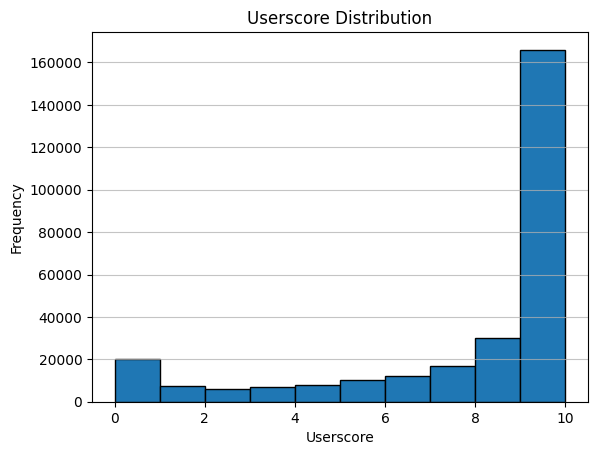

In [14]:
hist(userComments, 'Userscore')

In [15]:
userComments.head()

,Title,Platform,Userscore,Comment,Username
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,"Everything in OoT is so near at perfection, it...",SirCaestus
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I won't bore you with what everyone is already...,Kaistlin
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I'm one of those people who think that this is...,doodlerman
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,This game is the highest rated game on Metacr...,StevenA


In [16]:
userComments.shape

(283983, 5)

In [17]:
# some users commented & gave rating more than once per game and platform
(userComments.Title + userComments.Platform + userComments.Username).nunique()

281300

In [18]:
userComments[['Title', 'Comment']].groupby('Title').count().reset_index().sort_values(by = 'Comment', ascending = False).head(10)

,Title,Comment
218,Call of Duty: Modern Warfare 3,5841
407,Diablo III,4876
1933,The Elder Scrolls V: Skyrim,4239
1053,Mass Effect 3,3793
444,Dota 2,3563
739,Grand Theft Auto V,3562
575,Fallout 4,3529
117,Battlefield 3,2960
2022,The Witcher 3: Wild Hunt,2739
1955,The Legend of Zelda: Breath of the Wild,2641


### gameInfo

In [19]:
gameInfo.drop(columns = 'Unnamed: 0', inplace = True)

In [20]:
gameInfo.loc[gameInfo.Metascore == 'not specified', 'Metascore'] = -999
gameInfo['Metascore'] = gameInfo.Metascore.astype('float64')

gameInfo.loc[gameInfo.Avg_Userscore == 'not specified', 'Avg_Userscore'] = -999
gameInfo.loc[gameInfo.Avg_Userscore == 'tbd', 'Avg_Userscore'] = -998
gameInfo['Avg_Userscore'] = gameInfo.Avg_Userscore.astype('float64')

gameInfo.loc[gameInfo.Year == 'not specified', 'Year'] = -999
gameInfo['Year'] = gameInfo.Year.astype('int64')

In [21]:
gameInfo = gameInfo[gameInfo.Year != -999] # 11 rows removed (all Metascore = -999 are removed too)
gameInfo = gameInfo[gameInfo.Avg_Userscore != -999] # 1 row removed

gameInfo[gameInfo.Avg_Userscore == -998].shape # 75 rows .. keep? not sure if this col is impt

(75, 8)

In [22]:
# No_Players >> 52 categories .. combine them??
gameInfo.No_Players.value_counts().shape
# gameInfo.No_Players.value_counts()

(52,)

In [23]:
# gameInfo.No_Players.value_counts()

In [24]:
# No_Players .. 7 missing entries
gameInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          4988 non-null   object 
 1   Year           4988 non-null   int64  
 2   Publisher      4988 non-null   object 
 3   Genre          4988 non-null   object 
 4   Platform       4988 non-null   object 
 5   Metascore      4988 non-null   float64
 6   Avg_Userscore  4988 non-null   float64
 7   No_Players     4981 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 350.7+ KB


In [25]:
gameInfo.Metascore.describe()

count    4988.000000
mean       83.123697
std         4.342992
min        77.000000
25%        80.000000
50%        82.000000
75%        86.000000
max        99.000000
Name: Metascore, dtype: float64

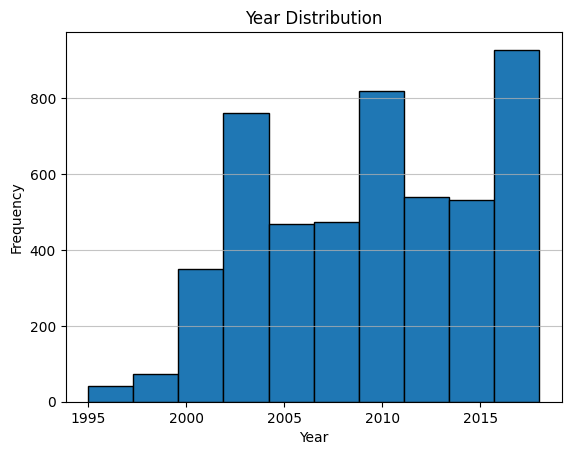

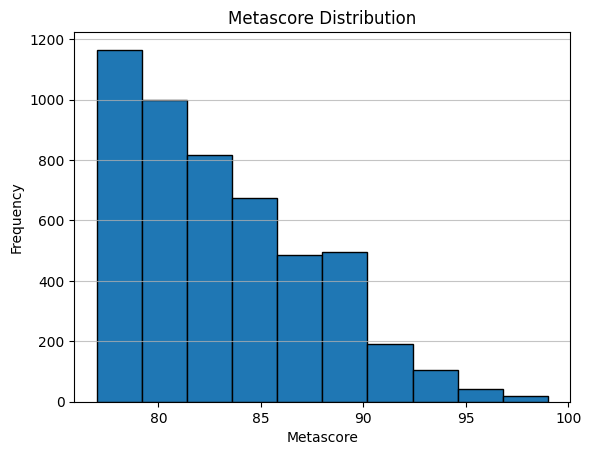

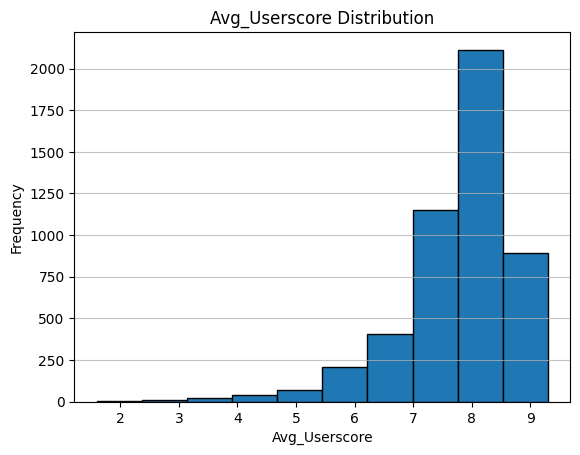

In [26]:
for x in gameInfo.select_dtypes(include=['Int64', 'float64']):
    if x == 'Avg_Userscore':
        test = gameInfo[gameInfo[x] != -998]
        hist(test, x)
    else:
        hist(gameInfo, x)

In [27]:
gameInfo.head()

,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99.0,9.1,1 Player
1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98.0,7.4,1-2
2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98.0,7.5,1 Player
3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98.0,8.6,1-2
4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98.0,7.9,1 Player


In [28]:
gameInfo.shape

(4988, 8)

In [29]:
gameInfo.Title.nunique()

3433

In [30]:
(gameInfo.Title + gameInfo.Year.astype(str) + gameInfo.Publisher + gameInfo.Genre + gameInfo.Platform).nunique()

4988

### ratingsAndReleaseDate

In [31]:
ratingsAndReleaseDate.head()

,name,platform,user_rating,critic_rating,release_date,summary,description,metacritic
0,Full Throttle,PC,8.5,86,"April 30, 1995","You're Ben--beaten, framed for murder and left...","<p>One minute you&#39;re on the road, riding. ...",86.0
1,Sid Meier's Civilization II,PC,8.7,94,"February 29, 1996",An empire-building turn-based strategy game. T...,"<p>Make every critical social, economic and po...",94.0
2,Quake,PC,8.8,94,"June 22, 1996",Rage through 32 single player levels and 6 dea...,<h3>The roots</h3>\r\n<p>One of the classic re...,94.0
3,Diablo,PC,8.6,94,"December 31, 1996",The kingdom of Khandaras has fallen into chaos...,"<p>Traveler, stay awhile and listen...</p>\r\n...",94.0
4,Super Mario 64,Nintendo 64,9.1,94,"September 26, 1996",Mario is super in a whole new way! Combining t...,<p>Mario is super in a whole new way! Combinin...,94.0


In [32]:
# unique names!
ratingsAndReleaseDate.shape
ratingsAndReleaseDate.name.nunique()

209

### gameScore

In [33]:
gameScore.user_score.count()
gameScore.meta_score.count()
gameScore.shape

(121050, 7)

In [34]:
(gameScore.name + gameScore.platform + gameScore.release_date.astype(str)).nunique()

120964

### gameSales

In [35]:
gameSales.shape

(8896, 15)

In [36]:
(gameSales.title + gameSales.platform + gameSales.genre + gameSales.publisher).nunique()

8893